# Tools

Here are some basic skills that you should master to get started with Pandas.

## Creating a DataFrame

In [1]:
!pip install pandas

     |████████████████████████████████| 9.9 MB 10.6 MB/s eta 0:00:01
  Using cached numpy-1.19.4-cp37-cp37m-macosx_10_9_x86_64.whl (15.3 MB)
     |████████████████████████████████| 509 kB 10.6 MB/s eta 0:00:01


In [2]:
# import pandas with the shortened name "pd"
import pandas as pd

### From a dictionary:

In [3]:
data = {
    'directors': ['wesley', 'jessica', 'zander', 'arun'],
    'eggs_eaten': [2, 1, 4, 30]
}

# pass to DataFrame constructor
eggs_df = pd.DataFrame(data)
eggs_df

,directors,eggs_eaten
0,wesley,2
1,jessica,1
2,zander,4
3,arun,30


In [4]:
# Setting the index
data['directors']

['wesley', 'jessica', 'zander', 'arun']

In [5]:
eggs_df = pd.DataFrame({'eggs_eaten': data['eggs_eaten']}, index=data['directors'])
eggs_df

,eggs_eaten
wesley,2
jessica,1
zander,4
arun,30


In [6]:
# Locating data by an index
eggs_df.loc['arun']

eggs_eaten    30
Name: arun, dtype: int64

### From a 2D array:

In [7]:
import numpy as np
data = np.array([[12, 2.5], [12, 34], [24, 12.3]])
data

array([[12. ,  2.5],
       [12. , 34. ],
       [24. , 12.3]])

In [8]:
numpy_df = pd.DataFrame(data)
numpy_df

,0,1
0,12.0,2.5
1,12.0,34.0
2,24.0,12.3


In [9]:
# name the columns
numpy_df = pd.DataFrame({'Col1': data[:, 0], 'Col2': data[:, 1]})
numpy_df

,Col1,Col2
0,12.0,2.5
1,12.0,34.0
2,24.0,12.3


## Outputting data to a CSV

In [9]:
eggs_df

,eggs_eaten
wesley,2
jessica,1
zander,4
arun,30


In [10]:
eggs_df.to_csv('eggdata.csv')

## Reading in data

### From a CSV:

In [11]:
new_eggs_df = pd.read_csv('eggdata.csv')
new_eggs_df

,Unnamed: 0,eggs_eaten
0,wesley,2
1,jessica,1
2,zander,4
3,arun,30


CSV's don't have index functionality built in, so you will need to specily the `index_col` when you're reading in the CSV.

In [12]:
new_eggs_df = pd.read_csv('eggdata.csv', index_col=0)
new_eggs_df

,eggs_eaten
wesley,2
jessica,1
zander,4
arun,30


### From a JSON:

JSON is basically a stored python dictionary, and as you're scraping the web, you may find that some data sources may be stored in this format. You can read a JSON file into a DataFrame using:

```
df = pd.read_json('myjsonfile.json')
```

# Movie Demo

Let's go ahead and practice some things on a real dataset. Import the 'movies.csv' file with the Title column as the index for the table.

In [13]:
movies = pd.read_csv('movies.csv', index_col = 'Title')

## Data Exploration

### Viewing your data

One of the first things you want to do is view the first couple of rows of your dataset, both to verify that it's correct, and to keep it as a reference for later analysis.

In [14]:
# get first 5 rows of movies
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


You can also pass in the number of rows you want to view with `movies.head(<a number>)`, or view it from the end of the table with `movies.tail()`.

### Getting info about the movie data

You should also run this almost immediately to check things like the size of your dataset and how many missing values you have. 

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


You can also use the `.shape` attribute of a dataframe to output a tuple of (rows, columns). You may need to use this a lot as you're cleaning your data to check how your dataframe has been affected.

In [16]:
# 1000 rows (but not all values are non-null), and 11 columns
movies.shape

(1000, 11)

### Looking at the distribution

In [17]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [18]:
movies['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [19]:
movies['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

### Binary Correlations

In [20]:
movies.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


## Data cleaning

### Dropping duplicates

Since this dataset doesn't have duplicates, let's make some just to show how you might want to handle duplicates in real life.

`.append(DATAFRAME)` will create a copy of the merged dataframes without editing the original movies dataframe.

In [21]:
temp_movies = movies.append(movies)
temp_movies.shape

(2000, 11)

In [22]:
# notice this creates a copy again
temp_movies = temp_movies.drop_duplicates()
temp_movies.shape

(1000, 11)

Notice that a lot of Pandas methods create copies, so you will have to create copies of dataframes and assigning dataframes to the same variable. This can get quite lengthy!! Pandas methods usually have an `inplace=True` keyword argument that you can pass in to modify the original dataframe:

```
temp_movies.drop_duplicates(inplace=True)
```

### Renaming Columns

A lot of times, the pre-existing column names for a dataset will be lengthy and hard to read. 

In [23]:
movies.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

We can use copy and paste and a `dict` to rename only some of the columns.

In [24]:
movies.rename(columns={'Runtime (Minutes)': 'Runtime',
                      'Revenue (Millions)': 'Revenue_millions'}, 
                       inplace=True)
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [25]:
# Change all column names to lowercase
movies.columns = [c.lower() for c in movies]
movies.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### Conditionals

You can select rows that meet certain criteria. 

Read this as select rows in `movies` where `movies['rating']` is greater than 8.6.

In [26]:
movies[movies['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [27]:
movies[
    ((movies['year'] >= 2005) & (movies['year'] <= 2010))
    & (movies['rating'] > 8.0)
    & (movies['revenue_millions'] < movies['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


### Vectorization

Vectorization is a technique where you apply some kind of operation to an entire array instead of individual elements. This is seen in the `apply()` function, which is much faster than iterating manually over rows. This function is especially useful for NLP, when you will need to apply tons of text-cleaning functions to Series and DataFrames.

In [28]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Here, we are making a new column `rating_category` by applying rating_function to the existing `rating` column.

In [29]:
movies["rating_category"] = movies["rating"].apply(rating_function)
movies.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


### Handling null values

Let's check which columns have null values. 

In [30]:
# returns a df of booleans, where True means the cell has a null value
movies.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
# Use the aggregate function sum() to count the number of nulls
movies.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
rating_category       0
dtype: int64

#### Approaches to handling missing data

In general, there are several main ways to handle missing data. 
You can:
1. Get rid of the rows/columns with missing data. 
2. Encode null values as some integer, such as -1
3. Imputation: make a good guess what the value is
    - Replace it with the mean/median/mode
    - Use some kind of predictive model to predict the value, based on other values in the row
4. Use the number of missing values to engineer another feature???

##### Dropping values

In [32]:
# Approach 1 

# drop rows with missing values
temp = movies.dropna() 
temp.shape

(838, 12)

In [33]:
# drop columns with missing values
temp =  movies.dropna(axis=1)
temp.shape

(1000, 10)

In [34]:
temp.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'rating_category'],
      dtype='object')

##### Encoding

In [35]:
temp = movies.fillna(-1)

In [36]:
temp.tail()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,-1.00,45.0,bad
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,bad
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,bad
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,-1.00,22.0,bad
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0,bad


##### Imputation

In [37]:
temp_movies = movies.copy()
revenue = temp_movies['revenue_millions']
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

In [38]:
# use aggregate function mean()
revenue_mean = revenue.mean()
revenue_mean

82.95637614678898

In [39]:
revenue.fillna(revenue_mean, inplace=True)

In [40]:
temp_movies.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
rating_category      0
dtype: int64

In [41]:
temp_movies['metascore'].fillna(temp_movies['metascore'].mean(), inplace=True)
temp_movies.isnull().sum()

rank                0
genre               0
description         0
director            0
actors              0
year                0
runtime             0
rating              0
votes               0
revenue_millions    0
metascore           0
rating_category     0
dtype: int64

##### Smarter (?) imputation with linear regression

In [42]:
#!pip install sklearn
#!pip install matplotlib
#!pip install seaborn

#### Dummy variables

In [43]:
movies['genre'] = movies['genre'].str.split(",", n = 1, expand = True)
dummy = pd.get_dummies(movies['genre'])
dummy.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
Title,,,,,,,,,,,,,
Guardians of the Galaxy,1,0,0,0,0,0,0,0,0,0,0,0,0
Prometheus,0,1,0,0,0,0,0,0,0,0,0,0,0
Split,0,0,0,0,0,0,0,0,1,0,0,0,0
Sing,0,0,1,0,0,0,0,0,0,0,0,0,0
Suicide Squad,1,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
movies = pd.concat([movies, dummy], axis=1)
movies.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,...,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
Title,,,,,,,,,,,,,,,,,,,,,
Guardians of the Galaxy,1,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,0,0,0,0,0,0,0,0,0,0
Prometheus,2,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,0,0,0,0,0,0,0,0,0,0
Split,3,Horror,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,0,0,0,0,0,1,0,0,0,0
Sing,4,Animation,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,0,0,0,0,0,0,0,0,0,0
Suicide Squad,5,Action,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Drop miscellaneous columns/columns with null values for training
temp_movies = movies.drop(['genre', 'description', 'director', 'actors', 'metascore', 'rating_category'], axis=1)
temp_movies = temp_movies.dropna()
temp_movies.drop('Thriller', axis=1, inplace=True)

In [47]:
#!pip install sklearn

Processing /Users/jhuang/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 7.2 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 9.2 MB/s eta 0:00:01
  Using cached scipy-1.5.4-cp37-cp37m-macosx_10_9_x86_64.whl (28.7 MB)


In [48]:
# split data into 80/20 training & test
X = temp_movies.drop('revenue_millions', axis=1)
y = temp_movies[['revenue_millions']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [50]:
for idx, col_name in enumerate(X_train.columns):
    print("{} coefficient: {}".format(col_name, regression_model.coef_[0][idx]))

rank coefficient: -0.010771980388340138
year coefficient: 2.6075336913133853
runtime coefficient: 0.857442252500687
rating coefficient: -24.040359607741514
votes coefficient: 0.0003837444377813543
Action coefficient: 39.539226546766635
Adventure coefficient: 40.49129000812606
Animation coefficient: 133.28621377522526
Biography coefficient: 17.70845325649457
Comedy coefficient: 20.621193989297797
Crime coefficient: -9.36355779341468
Drama coefficient: 0.5260685204450537
Fantasy coefficient: 32.97470505659205
Horror coefficient: 14.572350616945227
Mystery coefficient: -2.574062380548294
Romance coefficient: 21.38729975845189
Sci-Fi coefficient: -9.277533256240604


In [51]:
intercept = regression_model.intercept_[0]
intercept

-5195.335457948428

In [52]:
# r^2
regression_model.score(X_test, y_test)

0.5757797822728999

In [53]:
parameters = X_train.columns
parameters

Index(['rank', 'year', 'runtime', 'rating', 'votes', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi'],
      dtype='object')

In [54]:
# fill in the values
rev = movies[pd.isnull(movies['revenue_millions'])]['revenue_millions']
predict = regression_model.predict(movies[pd.isnull(movies['revenue_millions'])][parameters])
predict = [arr[0] for arr in predict]
predictions = pd.Series(predict[0], index=rev.index)
movies['revenue_millions'].fillna(predictions, inplace=True)

In [55]:
#sanity check
movies.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
rating_category      0
Action               0
Adventure            0
Animation            0
Biography            0
Comedy               0
Crime                0
Drama                0
Fantasy              0
Horror               0
Mystery              0
Romance              0
Sci-Fi               0
Thriller             0
dtype: int64

##### Imputation Caveats

It may not always make sense to impute in certain way. For example, if you have a column that counts the number of arms that someone has, it doesn't make sense to replace null values with the mean, because almost everyone will have an above average number of arms.

Additionally, you can introduce bias into your data, either by unintentionally underestimating/overestimating things.

For this specific example, a linear regression can add a lot of bias because all of our predictions will fall along a line. You can fix this by using a stochastic linear regression imputation (adding a random residual to your predictions), but it still won't necessarily be great.

Some other approaches include MICE (multivariate imputation by chained equation) and deep-learning approaches for categorical features (datawig).

[MICE]('https://impyute.readthedocs.io/en/latest/_modules/impyute/imputation/cs/mice.html')

[Datawig]('https://github.com/awslabs/datawig')

## Super brief plotting

### Scatterplot

In [57]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 4.4 MB/s eta 0:00:01
  Using cached kiwisolver-1.3.1-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-8.0.1-cp37-cp37m-macosx_10_10_x86_64.whl (2.2 MB)


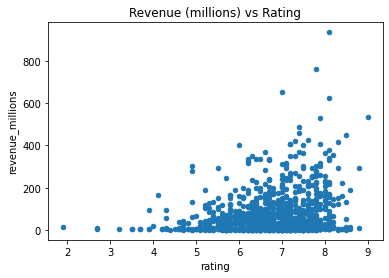

In [58]:
movies.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

### Histogram

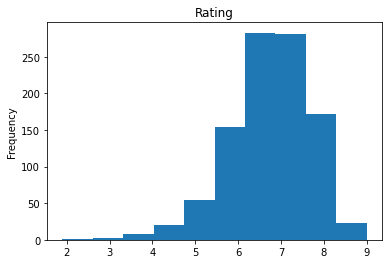

In [59]:
movies['rating'].plot(kind='hist', title='Rating');

### Boxplot

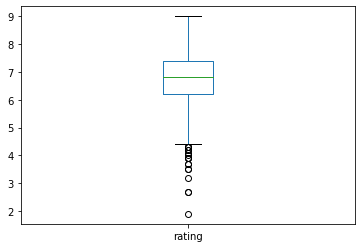

In [60]:
movies['rating'].plot(kind="box");

### Grouped boxplot

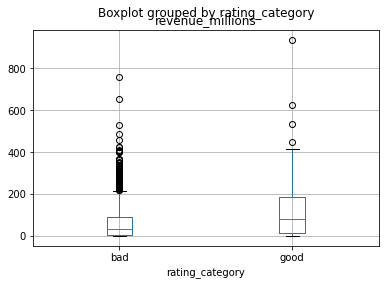

In [61]:
movies.boxplot(column='revenue_millions', by='rating_category');

In [62]:
!pip freeze > requirements.txt